# Covariance & Correlation

# 1. Covariance

- Covariance indicates the level to which two variables vary together. 

- Positive covariance: If 𝐶𝑜𝑣(𝐴,𝐵) > 0, then 𝐴 and 𝐵 both tend to be larger or smaller than their expected values.

- Negative covariance: If 𝐶𝑜𝑣(𝐴,𝐵) < 0 then 𝐴 is larger than its expected value, 𝐵 is likely to be smaller than its expected value or vice versa.

- Independence implies 𝐶𝑜𝑣(𝐴,𝐵) = 0 ; But the converse is not true!

- Some pairs of random variables may have a covariance of 0 but are not independent. 

- Only under some additional assumptions a covariance of 0 imply independence.

- Covariance provides the sign (direction) of the relationship between 2 variables but not the strength of the relationship. 

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
x = np.array([2,3,5,4,6])
y = np.array([5,8,10,11,14])
print('cov_x_y = cov_y_x =', (x*y).sum()/5-x.mean()*y.mean())
print('cov_x_x = ', x.std()**2)
print('cov_y_y = ', y.std()**2)
np.cov(x,y, bias=True) 


cov_x_y = cov_y_x = 4.0
cov_x_x =  2.0000000000000004
cov_y_y =  9.040000000000001


array([[2.  , 4.  ],
       [4.  , 9.04]])

In [9]:
x = np.arange(-1,1.01,0.01)
y = 2*x
x2 = x*x
x3 = x*x*x
df = pd.DataFrame({'x': x, 'y': y, 'x^2': x2, 'x^3': x3})
display(df.head())
display(df.cov())
display(df.corr())

,x,y,x^2,x^3
0,-1.00,-2.00,1.0000,-1.000000
1,-0.99,-1.98,0.9801,-0.970299
2,-0.98,-1.96,0.9604,-0.941192
3,-0.97,-1.94,0.9409,-0.912673
4,-0.96,-1.92,0.9216,-0.884736


,x,y,x^2,x^3
x,3.383500e-01,6.767000e-01,6.391036e-16,2.050333e-01
y,6.767000e-01,1.353400e+00,1.278207e-15,4.100667e-01
x^2,6.391036e-16,1.278207e-15,9.112217e-02,6.081432e-16
x^3,2.050333e-01,4.100667e-01,6.081432e-16,1.479071e-01


,x,y,x^2,x^3
x,1.000000e+00,1.000000e+00,3.303706e-15,9.165303e-01
y,1.000000e+00,1.000000e+00,3.303706e-15,9.165303e-01
x^2,3.303706e-15,3.303706e-15,1.000000e+00,5.101972e-15
x^3,9.165303e-01,9.165303e-01,5.101972e-15,1.000000e+00


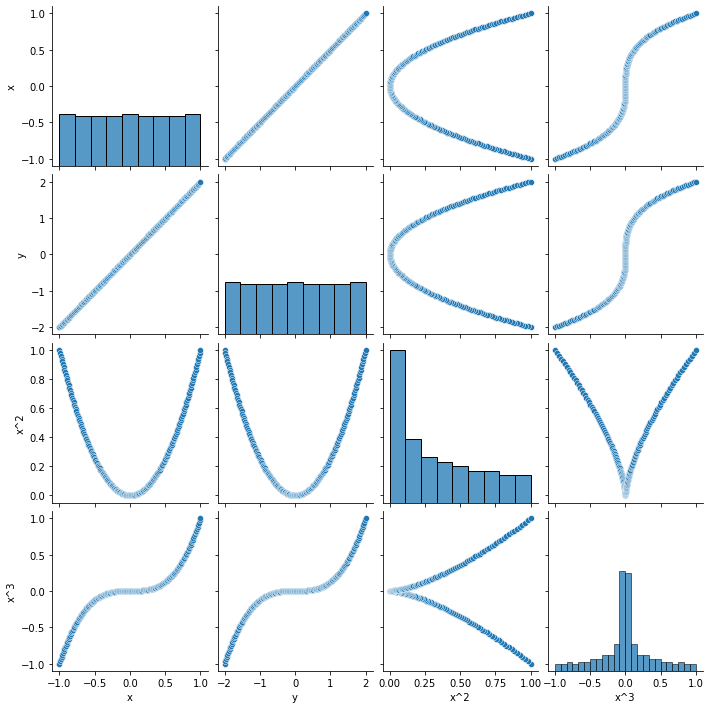

In [10]:
_=sns.pairplot(df)

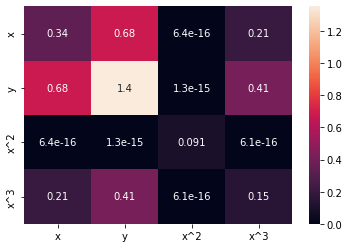

In [11]:
_ = sns.heatmap(df.cov(),annot=True)

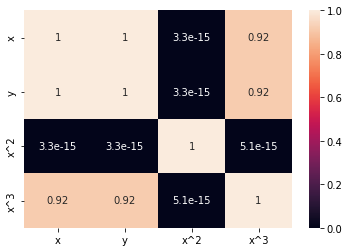

In [12]:
_ = sns.heatmap(df.corr(), annot=True)

# 2. Correlations

- The Pearson correlation coefficient measures the linear relationship between two datasets. The calculation of the p-value relies on the assumption that each dataset is normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

- The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. 

- Kendall’s tau is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, and values close to -1 indicate strong disagreement..

In [13]:
def apply_all_r(x,y):
    print('PearsonrResult: ',stats.pearsonr(x,y)) #Pearson correlation coefficient and p-value for testing non-correlation.
    print(stats.spearmanr(x,y)) #Calculate a Spearman correlation coefficient with associated p-value.
    print(stats.kendalltau(x,y)) #Calculate Kendall’s tau, a correlation measure for ordinal data.

### positive linear correlation

PearsonrResult:  PearsonRResult(statistic=0.8877734779818065, pvalue=8.55029228195255e-35)
SpearmanrResult(correlation=0.8948574857485747, pvalue=4.1762051325675604e-36)
KendalltauResult(correlation=0.7195959595959597, pvalue=2.733893972581018e-26)


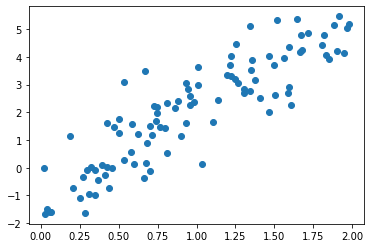

In [14]:
n = 100
x = np.random.uniform(0, 2, n)
y = 3*x - 1 + np.random.normal(0,1,n)
apply_all_r(x,y)
_ = plt.scatter(x,y)

PearsonrResult:  PearsonRResult(statistic=0.9984072752258984, pvalue=3.5019479003521567e-124)
SpearmanrResult(correlation=0.9977677767776776, pvalue=5.2604013880045625e-117)
KendalltauResult(correlation=0.9668686868686871, pvalue=4.277908790354649e-46)


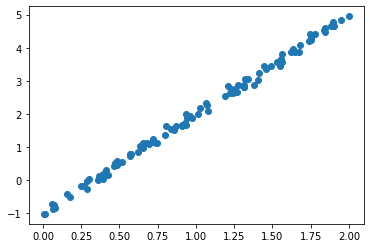

In [15]:
n = 100
x = np.random.uniform(0, 2, n)
y = 3*x - 1 + np.random.normal(0,0.1,n)
apply_all_r(x,y)
_ = plt.scatter(x,y)

### negative linear correlation

PearsonrResult:  PearsonRResult(statistic=-0.851735971980063, pvalue=2.920206423698391e-29)
SpearmanrResult(correlation=-0.857113711371137, pvalue=5.4732991496089036e-30)
KendalltauResult(correlation=-0.6593939393939394, pvalue=2.463905531814245e-22)


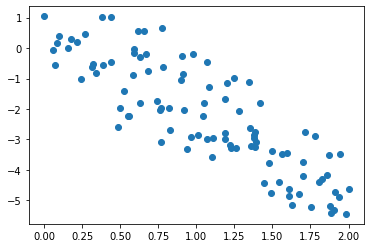

In [16]:
n = 100
x = np.random.uniform(0, 2, n)
y = - 3*x + 1 + np.random.normal(0,1,n)
apply_all_r(x,y)
_ = plt.scatter(x,y)

PearsonrResult:  PearsonRResult(statistic=-0.9983125891317228, pvalue=5.91925378666897e-123)
SpearmanrResult(correlation=-0.9966876687668766, pvalue=1.283459106316278e-108)
KendalltauResult(correlation=-0.9583838383838384, pvalue=2.5461871173108518e-45)


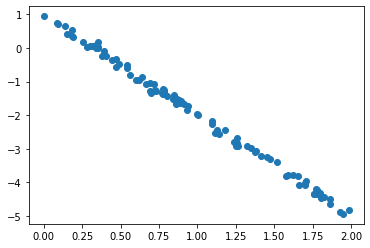

In [17]:
n = 100
x = np.random.uniform(0, 2, n)
y = - 3*x + 1 + np.random.normal(0,0.1,n)
apply_all_r(x,y)
_ = plt.scatter(x,y)

### no linear correlation

PearsonrResult:  PearsonRResult(statistic=-0.05296407126510067, pvalue=0.6007311456692288)
SpearmanrResult(correlation=-0.03656765676567657, pvalue=0.7179499780084904)
KendalltauResult(correlation=-0.023030303030303033, pvalue=0.7342290947248737)


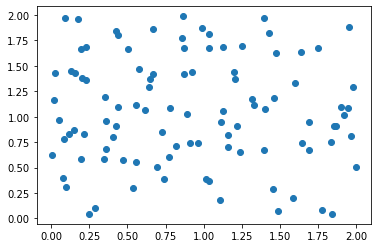

In [18]:
n = 100
x = np.random.uniform(0, 2, n)
y = np.random.uniform(0, 2, n)
apply_all_r(x,y)
_ = plt.scatter(x,y)

PearsonrResult:  PearsonRResult(statistic=0.2823950886122349, pvalue=0.004418496464615054)
SpearmanrResult(correlation=0.3166036603660366, pvalue=0.0013310059157371412)
KendalltauResult(correlation=0.22383838383838386, pvalue=0.0009676981990633245)


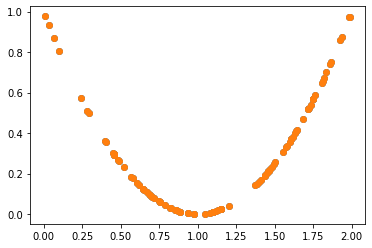

In [19]:
n = 100
x = np.random.uniform(0, 2, n)
y = (x-1)**2 
plt.scatter(x,y)
apply_all_r(x,y)
_ = plt.scatter(x,y)

### monotonic relationship

PearsonrResult:  PearsonRResult(statistic=0.8950565900803698, pvalue=3.824612162761539e-36)
SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)
KendalltauResult(correlation=1.0, pvalue=2.143020576250934e-158)


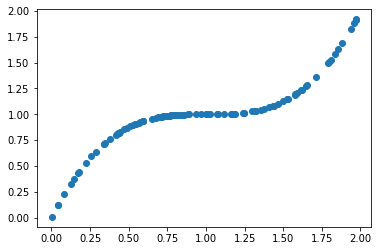

In [20]:
n = 100
x = np.random.uniform(0, 2, n)
y = (x-1)**3 + 1
apply_all_r(x,y)
_ = plt.scatter(x,y)

PearsonrResult:  PearsonRResult(statistic=-0.6464150592975814, pvalue=3.7624601822031306e-13)
SpearmanrResult(correlation=-0.9999969996954691, pvalue=1.0883281036526193e-257)
KendalltauResult(correlation=-0.9998989847969545, pvalue=3.63367158725911e-49)


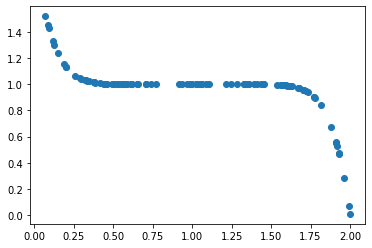

In [21]:
n = 100
x = np.random.uniform(0, 2, n)
y = (1-x)**9 + 1
apply_all_r(x,y)
_ = plt.scatter(x,y)